In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
testing <- read_csv("data/testing.csv")

New names:
• `` -> `...1`
Rows: 6987 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
training <- read_csv("data/training_csv.txt")

New names:
• `` -> `...1`
Rows: 27944 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
testing

...1,city,price,number_beds,number_baths,province,median_family_income
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Toronto,799999,3,1,Ontario,97000
2,Toronto,799900,2,2,Ontario,97000
3,Toronto,699000,2,2,Ontario,97000
4,Toronto,498800,1,1,Ontario,97000
5,Toronto,1450000,4,2,Ontario,97000
6,Toronto,745000,2,2,Ontario,97000
7,Toronto,1099000,3,2,Ontario,97000
8,Toronto,718000,1,1,Ontario,97000
9,Toronto,2699900,4,3,Ontario,97000


In [5]:
training

...1,city,price,number_beds,number_baths,province,median_family_income
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Toronto,438000,2,1,Ontario,97000
2,Toronto,399900,2,1,Ontario,97000
3,Toronto,359000,1,1,Ontario,97000
4,Toronto,415000,2,1,Ontario,97000
5,Toronto,45000,3,5,Ontario,97000
6,Toronto,399000,1,1,Ontario,97000
7,Toronto,449000,1,1,Ontario,97000
8,Toronto,459900,3,2,Ontario,97000
9,Toronto,399900,1,1,Ontario,97000


In [26]:
housing_recipe <- recipe(price ~ median_family_income, data = training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

training <- training |>
    mutate(log_price = log(price))

testing <- testing |>
  mutate(log_price = log(price))

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_vfold <- vfold_cv(training, v = 5, strata = log_price)

housing_workflow <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec)

housing_workflow



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [27]:
tuned_housing <- housing_workflow |>
  tune_grid(resamples = housing_vfold, grid = 10) |>
  collect_metrics()|>
  filter(.metric == "rmse")

tuned_housing

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1138630,5,31806.81,Preprocessor1_Model01
3,rmse,standard,1133883,5,30830.25,Preprocessor1_Model02
4,rmse,standard,1136308,5,30853.66,Preprocessor1_Model03
5,rmse,standard,1134696,5,31591.28,Preprocessor1_Model04
8,rmse,standard,1133034,5,31911.47,Preprocessor1_Model05
9,rmse,standard,1132700,5,31380.36,Preprocessor1_Model06
11,rmse,standard,1132358,5,32381.82,Preprocessor1_Model07
12,rmse,standard,1133188,5,31915.56,Preprocessor1_Model08
13,rmse,standard,1132963,5,31893.99,Preprocessor1_Model09


In [28]:
housing_min <- tuned_housing |>
    filter(mean == min(mean))

housing_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,1132358,5,32381.82,Preprocessor1_Model07


In [29]:
#Use K = 2 Neighbours 

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_fit <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec) |>
  fit(data = training)

housing_summary <- housing_fit |>
  predict(testing) |>
  bind_cols(testing) |>
  metrics(truth = log_price, estimate = .pred) |>
  filter(.metric == 'rmse')

housing_summary

New names:
• `...1` -> `...2`


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,373272.6


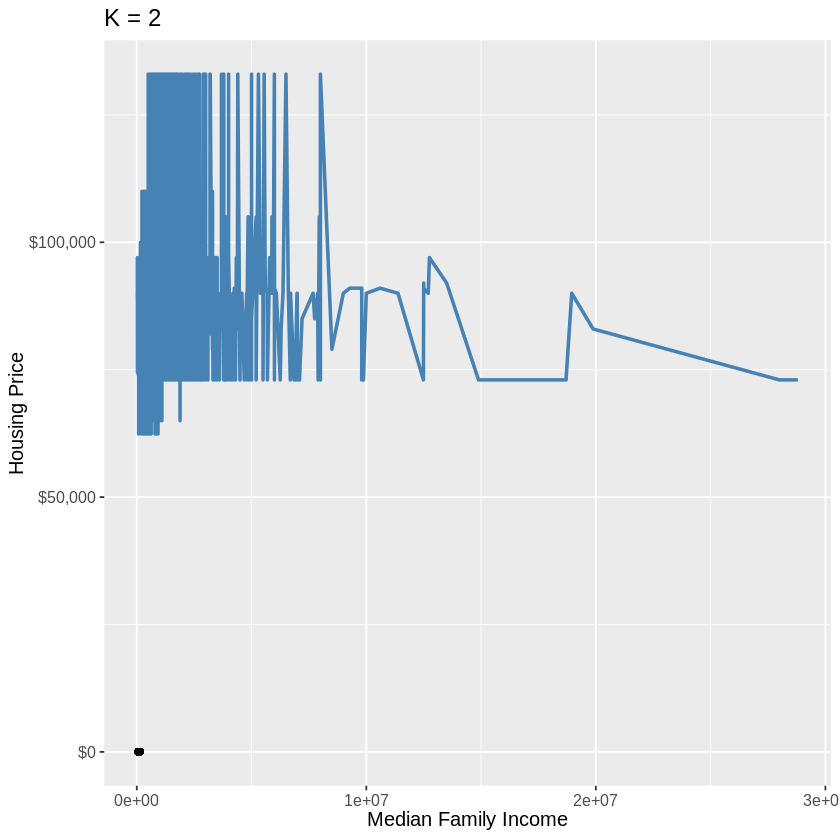

In [32]:
housing_plot <- ggplot(testing, aes(x = median_family_income, y = log_price)) +
  geom_point(alpha = 0.4) +
  geom_line(data = testing,
            mapping = aes(x = price, y = median_family_income),
            color = "steelblue",
            linewidth = 1) +
  xlab("Median Family Income") +
  ylab("Housing Price") +
  scale_y_continuous(labels = dollar_format()) +
  ggtitle("K = 2") +
  theme(text = element_text(size = 12))

housing_plot